In [81]:
%config IPCompleter.greedy = True
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd
import researchpy as rp

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from scipy import stats

In [82]:
#Reading dataset
data = pd.read_excel('HR+Diversity+problem.xlsx')
data.head()

,Gender,RaceDesc,Position,MaritalDesc,Department,EmpSatisfaction
0,M,White,Production Technician I,Single,Production,5
1,F,White,Production Technician II,Married,Production,3
2,F,White,Production Technician I,Married,Production,5
3,M,White,Production Manager,Divorced,Production,3
4,F,White,Production Technician I,Divorced,Production,4


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           259 non-null    object
 1   RaceDesc         259 non-null    object
 2   Position         259 non-null    object
 3   MaritalDesc      259 non-null    object
 4   Department       259 non-null    object
 5   EmpSatisfaction  259 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 12.3+ KB


In [84]:
# Importing Categorical Columns
data_cat = data[['Gender','RaceDesc','Position','MaritalDesc','Department','EmpSatisfaction']]

# Converting satisfaction into categorical variable.
data_cat['EmpSatisfaction'] = data_cat['EmpSatisfaction'].astype('object',copy=False)

In [85]:
data_cat.info() #Finding the shape, checking for null values, DataTypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           259 non-null    object
 1   RaceDesc         259 non-null    object
 2   Position         259 non-null    object
 3   MaritalDesc      259 non-null    object
 4   Department       259 non-null    object
 5   EmpSatisfaction  259 non-null    object
dtypes: object(6)
memory usage: 12.3+ KB


In [86]:
data_cat.isnull().sum()

Gender             0
RaceDesc           0
Position           0
MaritalDesc        0
Department         0
EmpSatisfaction    0
dtype: int64

In [87]:
data_cat.head()

,Gender,RaceDesc,Position,MaritalDesc,Department,EmpSatisfaction
0,M,White,Production Technician I,Single,Production,5
1,F,White,Production Technician II,Married,Production,3
2,F,White,Production Technician I,Married,Production,5
3,M,White,Production Manager,Divorced,Production,3
4,F,White,Production Technician I,Divorced,Production,4


# Question 1

#### Analyse the different departments within the company and the diversity in them with respect to different races. 
#### Which race has been the most abundant in the company? Which department has low diversity? 
#### Summarise the insights derived and prospective actionables for the HR department on the basis of those insights. 

## Finding the count and percentage of employees in each Department

### Doing Univariate analysis first on Department and Race

In [88]:
data_cat['Department'].value_counts()

Production              201
Sales                    26
IT/IS                    23
Software Engineering      9
Name: Department, dtype: int64

In [89]:
data_cat['Department'].value_counts(normalize=True)*100

Production              77.606178
Sales                   10.038610
IT/IS                    8.880309
Software Engineering     3.474903
Name: Department, dtype: float64

Text(0.5, 0, 'Department')

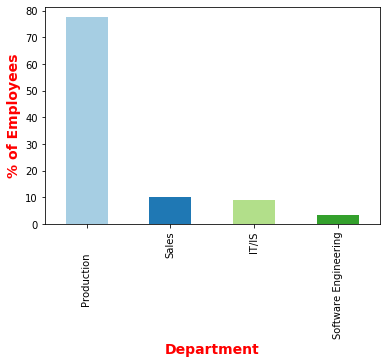

In [90]:
(data_cat['Department'].value_counts(normalize=True)*100).plot(kind='bar',color=plt.cm.Paired(np.arange(len(data_cat))))
plt.ylabel('% of Employees', fontweight='bold', color = 'Red', fontsize='14', horizontalalignment='center')
plt.xlabel('Department', fontweight='bold', color = 'Red', fontsize='14', horizontalalignment='center')

### We can see that Production Department has highest number of employees i.e 78%

In [91]:
data_cat.RaceDesc.unique()

array(['White', 'Two or more races', 'Asian', 'Black or African American'],
      dtype=object)

In [92]:
data_cat['RaceDesc'].value_counts()

White                        170
Black or African American     44
Asian                         28
Two or more races             17
Name: RaceDesc, dtype: int64

In [93]:
racePct = data_cat['RaceDesc'].value_counts(normalize=True)*100
racePct = round(racePct)
racePct

White                        66.0
Black or African American    17.0
Asian                        11.0
Two or more races             7.0
Name: RaceDesc, dtype: float64

Text(0.5, 0, 'Race')

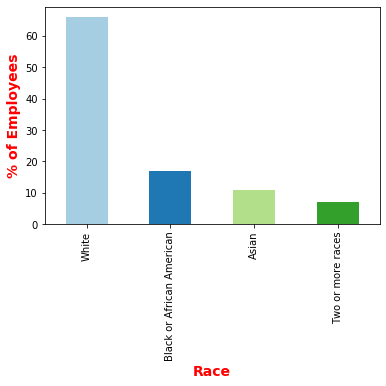

In [94]:
racePct.plot(kind='bar',color=plt.cm.Paired(np.arange(len(data_cat))))
plt.ylabel('% of Employees', fontweight='bold', color = 'Red', fontsize='14', horizontalalignment='center')
plt.xlabel('Race', fontweight='bold', color = 'Red', fontsize='14', horizontalalignment='center')

### We can see that White Race has highest number of employees i.e 68%

## Finding count of employees with respect to Diversity in each Department . Analysing different departments within the company and the diversity in them with respect to different races

## Doing BiVariate Analysis of Department and Race

In [95]:
departmentWRTRace = data_cat.groupby(['Department']).RaceDesc.value_counts().unstack()
departmentWRTRace

RaceDesc,Asian,Black or African American,Two or more races,White
Department,,,,
IT/IS,3.0,2.0,1.0,17.0
Production,22.0,31.0,10.0,138.0
Sales,1.0,8.0,6.0,11.0
Software Engineering,2.0,3.0,NaN,4.0


In [96]:
deptWisePctRace = (round(data_cat.groupby(['Department']).
                         RaceDesc.value_counts(normalize=True)*100)).unstack()
deptWisePctRace

RaceDesc,Asian,Black or African American,Two or more races,White
Department,,,,
IT/IS,13.0,9.0,4.0,74.0
Production,11.0,15.0,5.0,69.0
Sales,4.0,31.0,23.0,42.0
Software Engineering,22.0,33.0,NaN,44.0


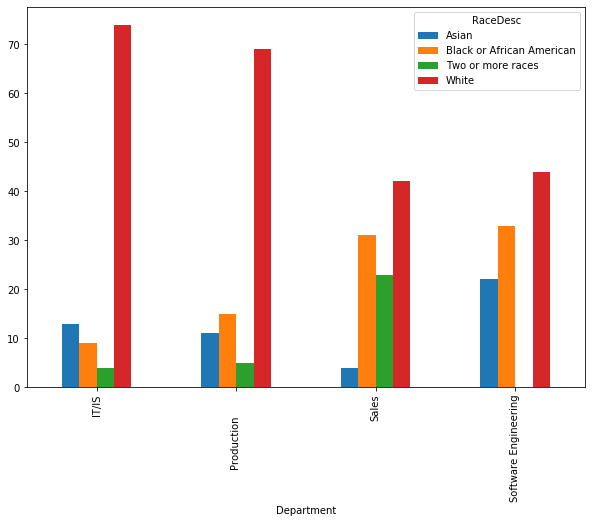

In [97]:
fig, ax = plt.subplots(figsize=(10,7))
deptWisePctRace.plot.bar(ax=ax)

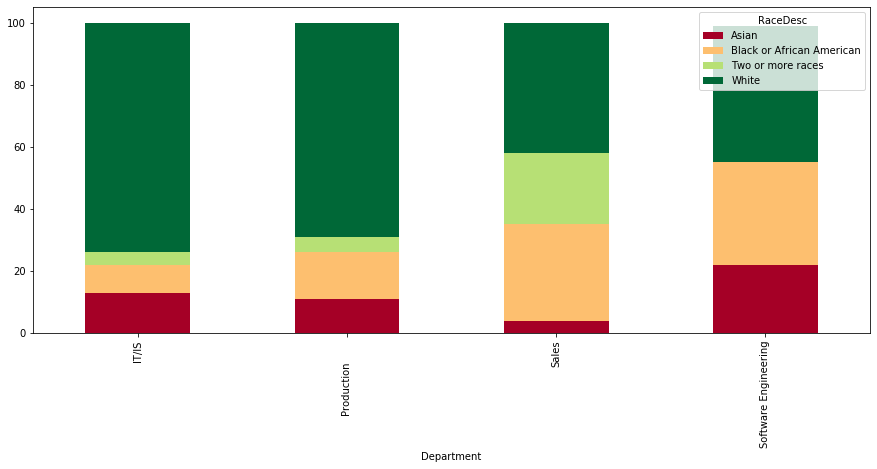

In [98]:
deptWisePctRace.plot(kind='bar', stacked=True, figsize=[15,6], colormap='RdYlGn')

## Finding the significant relationship between Department and Race using Chi Squared Test

In [99]:
crosstabDeptandRace = pd.crosstab(data_cat["Department"], data_cat["RaceDesc"])
crosstabDeptandRace

RaceDesc,Asian,Black or African American,Two or more races,White
Department,,,,
IT/IS,3,2,1,17
Production,22,31,10,138
Sales,1,8,6,11
Software Engineering,2,3,0,4


In [100]:
stats.chi2_contingency(crosstabDeptandRace)

(23.53107638216907,
 0.005107596384620323,
 9,
 array([[  2.48648649,   3.90733591,   1.50965251,  15.0965251 ],
        [ 21.72972973,  34.14671815,  13.19305019, 131.93050193],
        [  2.81081081,   4.41698842,   1.70656371,  17.06563707],
        [  0.97297297,   1.52895753,   0.59073359,   5.90733591]]))

In [101]:
crosstabDeptandRace, test_resultsDeptandRace , expected = rp.crosstab(data_cat["Department"], data_cat["RaceDesc"],test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
crosstabDeptandRace

RaceDesc                                              \
RaceDesc                Asian Black or African American Two or more races   
Department                                                                  
IT/IS                    1.16                      0.77              0.39   
Production               8.49                     11.97              3.86   
Sales                    0.39                      3.09              2.32   
Software Engineering     0.77                      1.16              0.00   
All                     10.81                     16.99              6.56   

                                     
RaceDesc              White     All  
Department                           
IT/IS                  6.56    8.88  
Production            53.28   77.61  
Sales                  4.25   10.04  
Software Engineering   1.54    3.47  
All                   65.64  100.00

In [102]:
test_resultsDeptandRace

,Chi-square test,results
0,Pearson Chi-square ( 9.0) =,23.5311
1,p-value =,0.0051
2,Cramer's V =,0.1740


# Question 2
### Analyse the distribution of people based on gender across the different positions of the company. Which position has the highest female to male ratio and which position has a ratio nearing 1? Summarise the insights derived and prospective actionables for the HR department on the basis of those insights. (10 Marks)


In [103]:
data_cat.head()


,Gender,RaceDesc,Position,MaritalDesc,Department,EmpSatisfaction
0,M,White,Production Technician I,Single,Production,5
1,F,White,Production Technician II,Married,Production,3
2,F,White,Production Technician I,Married,Production,5
3,M,White,Production Manager,Divorced,Production,3
4,F,White,Production Technician I,Divorced,Production,4


In [104]:
data_cat['Position'].value_counts()

Production Technician I     134
Production Technician II     54
Area Sales Manager           26
Production Manager           13
Software Engineer             9
IT Support                    8
Network Engineer              5
Database Administrator        5
Sr. Network Engineer          5
Name: Position, dtype: int64

In [105]:
round(data_cat['Position'].value_counts(normalize = True)*100)

Production Technician I     52.0
Production Technician II    21.0
Area Sales Manager          10.0
Production Manager           5.0
Software Engineer            3.0
IT Support                   3.0
Network Engineer             2.0
Database Administrator       2.0
Sr. Network Engineer         2.0
Name: Position, dtype: float64

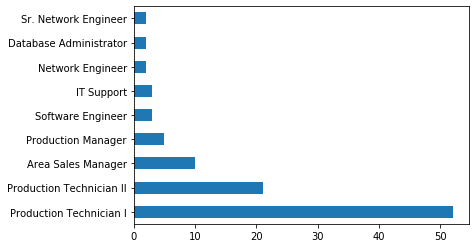

In [106]:
round(data_cat['Position'].value_counts(normalize = True)*100).plot.barh() 

In [107]:
data_cat.Gender.unique()

array(['M ', 'F'], dtype=object)

In [108]:
data_cat['Gender'] = data_cat['Gender'].str.strip()

In [109]:
data_cat['Gender'].value_counts()

F    154
M    105
Name: Gender, dtype: int64

In [110]:
round(data_cat['Gender'].value_counts(normalize = True)*100)

F    59.0
M    41.0
Name: Gender, dtype: float64

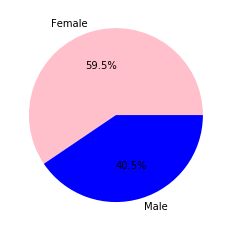

In [111]:
colors = ['Pink', 'Blue']
labels = ['Female','Male']
plt.pie(data_cat.Gender.value_counts(normalize=True), 
        labels = labels, colors=colors, startangle=360, autopct='%.1f%%')
plt.show()

In [112]:
GenderWRTPos = data_cat.groupby(['Gender']).Position.value_counts().unstack()
GenderWRTPos

Position,Area Sales Manager,Database Administrator,IT Support,Network Engineer,Production Manager,Production Technician I,Production Technician II,Software Engineer,Sr. Network Engineer
Gender,,,,,,,,,
F,12,4,5,2,6,82,35,6,2
M,14,1,3,3,7,52,19,3,3


In [113]:
positionsWRTGender = data_cat.groupby(['Position']).Gender.value_counts().unstack()
positionsWRTGender

Gender,F,M
Position,,
Area Sales Manager,12,14
Database Administrator,4,1
IT Support,5,3
Network Engineer,2,3
Production Manager,6,7
Production Technician I,82,52
Production Technician II,35,19
Software Engineer,6,3
Sr. Network Engineer,2,3


In [114]:
positionsWRTGenderPct = data_cat.groupby(['Position']).Gender.value_counts(normalize = True).unstack()
positionsWRTGenderPct = round(positionsWRTGenderPct*100)
positionsWRTGenderPct

Gender,F,M
Position,,
Area Sales Manager,46.0,54.0
Database Administrator,80.0,20.0
IT Support,62.0,38.0
Network Engineer,40.0,60.0
Production Manager,46.0,54.0
Production Technician I,61.0,39.0
Production Technician II,65.0,35.0
Software Engineer,67.0,33.0
Sr. Network Engineer,40.0,60.0


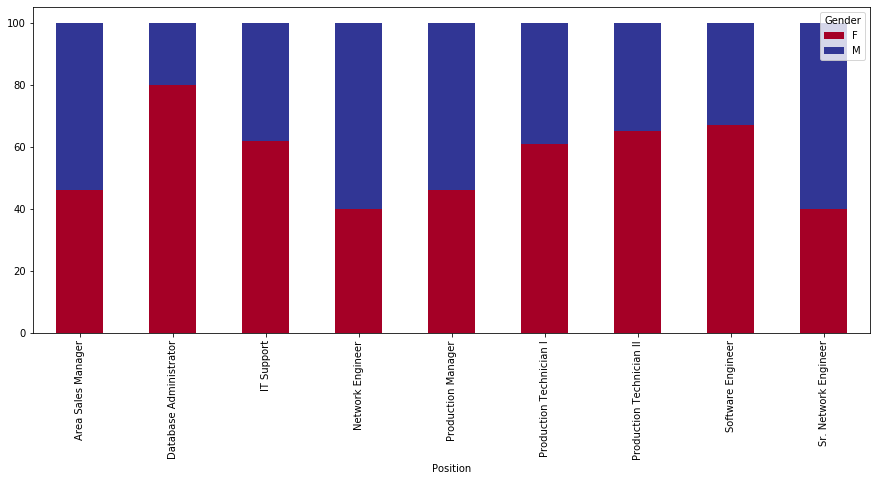

In [115]:
positionsWRTGenderPct.plot(kind='bar', stacked=True, figsize=[15,6], colormap='RdYlBu')

In [116]:
positionsWRTGender['FemaleToMaleRatio'] = positionsWRTGender.apply(lambda row: row['F']/row['M'], axis=1) 
positionsWRTGender

Gender,F,M,FemaleToMaleRatio
Position,,,
Area Sales Manager,12,14,0.857143
Database Administrator,4,1,4.000000
IT Support,5,3,1.666667
Network Engineer,2,3,0.666667
Production Manager,6,7,0.857143
Production Technician I,82,52,1.576923
Production Technician II,35,19,1.842105
Software Engineer,6,3,2.000000
Sr. Network Engineer,2,3,0.666667


# Doing Chi Test between Positions and Gender to find significant relationship

In [117]:
crosstabPosandGender = pd.crosstab(data_cat["Position"], data_cat["Gender"])
crosstabPosandGender

Gender,F,M
Position,,
Area Sales Manager,12,14
Database Administrator,4,1
IT Support,5,3
Network Engineer,2,3
Production Manager,6,7
Production Technician I,82,52
Production Technician II,35,19
Software Engineer,6,3
Sr. Network Engineer,2,3


In [118]:
stats.chi2_contingency(crosstabPosandGender)


(6.34475247757586,
 0.608674296318483,
 8,
 array([[15.45945946, 10.54054054],
        [ 2.97297297,  2.02702703],
        [ 4.75675676,  3.24324324],
        [ 2.97297297,  2.02702703],
        [ 7.72972973,  5.27027027],
        [79.67567568, 54.32432432],
        [32.10810811, 21.89189189],
        [ 5.35135135,  3.64864865],
        [ 2.97297297,  2.02702703]]))

In [119]:
crosstabPosandGender, test_resultsPosandGender , expected = rp.crosstab(data_cat["Position"], data_cat["Gender"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstabPosandGender

Gender               
Gender                        F      M     All
Position                                      
Area Sales Manager         4.63   5.41   10.04
Database Administrator     1.54   0.39    1.93
IT Support                 1.93   1.16    3.09
Network Engineer           0.77   1.16    1.93
Production Manager         2.32   2.70    5.02
Production Technician I   31.66  20.08   51.74
Production Technician II  13.51   7.34   20.85
Software Engineer          2.32   1.16    3.47
Sr. Network Engineer       0.77   1.16    1.93
All                       59.46  40.54  100.00

In [120]:
test_resultsPosandGender

,Chi-square test,results
0,Pearson Chi-square ( 8.0) =,6.3448
1,p-value =,0.6087
2,Cramer's V =,0.1565
